In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import scipy
from scipy.integrate import odeint

In [311]:
### Define constants:
m_to_au = 6.6846*10**(-12)   # au per meter           [conversion factor for distances]
G = (6.67408*10**(-11))*m_to_au**3   # au**3 / (kg * s**2)     [Gravitational constant]
T_Mercury = 7.603 * 10**6    # seconds                [seconds per Mercury year]
T_Venus = 1.944 * 10**7      # seconds                [seconds per Venus year]
T_Earth = 3.154 * 10**7      # seconds                [seconds per Earth year]
T_Mars = 5.936 * 10**7       # seconds                [seconds per Mars year]
T_Jupiter = 3.74017 * 10**8  # seconds                [seconds per Jupiter year]
T_Saturn = 9.145 * 10**8     # seconds                [seconds per Saturn year]
T_Uranus = 2.649 * 10**9     # seconds                [seconds per Uranus year]
T_Neptune = 5.203 * 10**9    # seconds                [seconds per Neptune year]

M0 = 1.989 * 10**30          # kg                     [Mass of Sun]
R0 = 695500000*m_to_au       # au                     [Radius of Sun]

M1 = 3.3 * 10**23            # kg                     [Mass of Mercury]
R1 = 2439000*m_to_au         # au                     [Radius of Mercury]
D1 = (5.79*10**10)*m_to_au   # au                     [Orbital distance Mercury-Sun]
V1 = np.sqrt(G*M0/D1)        # au/s                   [Orbital velocity of Mercury]

M2 = 4.87 * 10**24           # kg                     [Mass of Venus]
R2 = 6052000*m_to_au         # au                     [Radius of Venus]
D2 = (1.082*10**11)*m_to_au  # au                     [Orbital distance Venus-Sun]
V2 = np.sqrt(G*M0/D2)        # au/s                   [Orbital velocity of Venus]

M3 = 5.972 * 10**24          # kg                     [Mass of Earth]
R3 = 6378100*m_to_au         # au                     [Radius of Earth]
D3 = (1.496*10**11)*m_to_au  # au                     [Orbital distance Earth-Sun]
V3 = np.sqrt(G*M0/D3)        # au/s                   [Orbital velocity of Earth]

M4 = 6.42 * 10**23           # kg                     [Mass of Mars]
R4 = 3397000*m_to_au         # au                     [Radius of Mars]
D4 = (2.279*10**11)*m_to_au  # au                     [Orbital distance Mars-Sun]
V4 = np.sqrt(G*M0/D4)        # au/s                   [Orbital velocity of Mars]

M5 = 1.898 * 10**27          # kg                     [Mass of Jupiter]
R5 = 69911000*m_to_au        # au                     [Radius of Jupiter]
D5 = (7.786*10**11)*m_to_au  # au                     [Orbital distance Jupiter-Sun]
V5 = np.sqrt(G*M0/D5)        # au/s                   [Orbital velocity of Jupiter]

M6 = 5.69 * 10**26           # kg                     [Mass of Saturn]
R6 = 60268000*m_to_au        # au                     [Radius of Saturn]
D6 = (1.433*10**12)*m_to_au  # au                     [Orbital distance Saturn-Sun]
V6 = np.sqrt(G*M0/D6)        # au/s                   [Orbital velocity of Saturn]

M7 = 8.68 * 10**25           # kg                     [Mass of Uranus]
R7 = 25559000*m_to_au        # au                     [Radius of Uranus]
D7 = (2.873*10**12)*m_to_au  # au                     [Orbital distance Uranus-Sun]
V7 = np.sqrt(G*M0/D7)        # au/s                   [Orbital velocity of Uranus]

M8 = 1.03 * 10**26           # kg                     [Mass of Neptune]
R8 = 24764000*m_to_au        # au                     [Radius of Neptune]
D8 = (4.495*10**12)*m_to_au  # au                     [Orbital distance Neptune-Sun]
V8 = np.sqrt(G*M0/D8)        # au/s                   [Orbital velocity of Neptune]

rho = 2000                   # kg / m**3              [Density of Asteroid]
R01 = 1738100*m_to_au        # au                     [Radius of Asteroid]                Doing the Moon
Vol = (4/3)*np.pi*(R01**3)   # au**3                  [Volume of Asteroid]
M01 = 939.3*10**18           # kg                     [Mass of Asteroid]
D01 = D4                     # au                     [Orbital distance Asteroid-Sun]
V01 = V4/1.1                 # au/s                   [Orbital velocity of Asteroid]

### Energy of an orbit is given by: -(G*M*m) / (2*D)

Mass = [M0, M1, M2, M3, M4, M5, M6, M7, M8, M01]      # [Mass list for entire solar system]
Radius = [R0, R1, R2, R3, R4, R5, R6, R7, R8, R01]    # [Radius list to be used for collsions later]

print('mass of asteroid: {}'.format(M), 'kg')       # [print mass of asteroid for reference]
print('velocity of asteroid: {}'.format(V), 'm/s')  # [print velocity of asteroid for reference]

def energy_of_orbit(littlem, bigm, orbitdistance):
    return -(G*littlem*bigm)/(2*orbitdistance)
def kinetic_energy(m, v):
    return (1/2)*m*v**2

print("Energy of Earth's orbit:", energy_of_orbit(M3, M0, D3)) # [print energy of Earth's orbit for reference]
print('Kinetic energy of Asteroid:', kinetic_energy(M01, V01)) # [print kinetic energy of Asteroid for reference]
print(50*R0, D1)                                               # [check scale of collisions]

mass of asteroid: 5.972e+24 kg
velocity of asteroid: 1.991235945350545e-07 m/s
Energy of Earth's orbit: -118395514819.07451
Kinetic energy of Asteroid: 10102332.8069
0.232456965 0.38703834


In [312]:
#####  First attempt at a collision function, restarts simulation with new parameters

N = 1001
t3 = np.linspace(0, T_Earth, N)
t5 = np.linspace(T_Jupiter, 0, N)
t8 = np.linspace(0, T_Neptune, N)

y_arr = np.array([0.0,               0.0,              0.0,              0.0,
                  D1*np.cos(np.pi), -V1*np.sin(np.pi), D1*np.sin(np.pi), V1*np.cos(np.pi),
                  D2*np.cos(np.pi), -V2*np.sin(np.pi), D2*np.sin(np.pi), V2*np.cos(np.pi),
                  D3*np.cos(np.pi), -V3*np.sin(np.pi), D3*np.sin(np.pi), V3*np.cos(np.pi),
                  D4*np.cos(np.pi), -V4*np.sin(np.pi), D4*np.sin(np.pi), V4*np.cos(np.pi),
                  D5*np.cos(np.pi), -V5*np.sin(np.pi), D5*np.sin(np.pi), V5*np.cos(np.pi),
                  D6*np.cos(np.pi), -V6*np.sin(np.pi), D6*np.sin(np.pi), V6*np.cos(np.pi),
                  D7*np.cos(np.pi), -V7*np.sin(np.pi), D7*np.sin(np.pi), V7*np.cos(np.pi),
                  D8*np.cos(np.pi), -V8*np.sin(np.pi), D8*np.sin(np.pi), V8*np.cos(np.pi),
                  D*np.cos(np.pi/1.2),V01*np.sin(np.pi/1.2),D*np.sin(np.pi/1.2),-V01*np.cos(np.pi/1.2)])

In [313]:
### Need to modify this code to take into account inelastic collisions:

def genOrbitalMotion(y_arr, t):
    n = int(len(y_arr) / 4)
    
    X = np.zeros(n)
    Y = np.zeros(n)
    ans_arr = np.zeros_like(y_arr)
    Vx = np.zeros(n)                                   # velocity in x direction array
    Vy = np.zeros(n)                                   # velocity in y direction array
    Ax = np.zeros(n)                                   # acceleration in x direction array
    Ay = np.zeros(n)                                   # acceleration in y direction array
    
    X = y_arr[0 : : 4]                                 # assign x position array
    Y = y_arr[2 : : 4]                                 # assign y position array
    Vx = y_arr[1 : : 4]                                # assign Vx array
    Vy = y_arr[3 : : 4]                                # assign Vy array
    
    for i in range(n):
        sumx, sumy = 0, 0
        
        for j in range(n):
            if i == j:
                continue
            
            Sep = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2)      # Sep is direct separation between the bodies
            '''
            if Sep <= 50*(Radius[i] + Radius[j]):                   # Checks if a collision has ocurred
                if Mass[i] == 0 or Mass[j] == 0:
                    continue
                print('collision between', i, j)
                
                Vx[i] = (Mass[i]*Vx[i] + Mass[j]*Vx[j]) / (Mass[i] + Mass[j])
                Vy[i] = (Mass[i]*Vy[i] + Mass[j]*Vy[j]) / (Mass[i] + Mass[j])
                
                X[j] = X[i]
                Y[j] = Y[i]
                
                Vx[j] = Vx[i]
                Vy[j] = Vy[i]
                
                rho_i = (3*Mass[i]) / (4*np.pi*Radius[i]**3)
                rho_j = (3*Mass[j]) / (4*np.pi*Radius[j]**3)
                
                rho_mass_new = (((Mass[i]/(Mass[i] + Mass[j]))*rho_i) + (Mass[j]/(Mass[i] + Mass[j]))*rho_j)
                
                Radius[i] = ((3*Mass[i])/(4*np.pi*rho_mass_new))**(1/3)
                
                Mass[i] = Mass[i] + Mass[j]
                Mass[j] = 0
                continue
            '''
            sumx += -(G*Mass[j]*(X[i] - X[j])) / (Sep**3)
            sumy += -(G*Mass[j]*(Y[i] - Y[j])) / (Sep**3)
        
        Ax[i], Ay[i] = sumx, sumy
    
    ans_arr[0 : : 4] = Vx                              # assign Vx in ans_arr
    ans_arr[2 : : 4] = Vy                              # assign Vy in ans_arr
    ans_arr[1 : : 4] = Ax                              # assign Ax in ans_arr
    ans_arr[3 : : 4] = Ay                              # assign Ay in ans_arr
    return np.array(ans_arr)

def orbitalMotion(y_arr, t):
    ans_arr = odeint(genOrbitalMotion, y_arr, t)
    return np.array(ans_arr)

In [314]:
Period_Jupiter_Test_Collision = orbitalMotion(y_arr, t5)

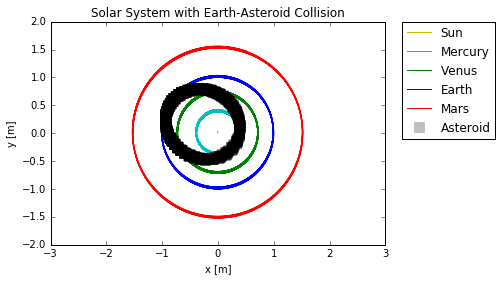

In [315]:
plt.plot(Period_Jupiter_Test_Collision[:,0],  Period_Jupiter_Test_Collision[:,2],  color='y', label='Sun')
plt.plot(Period_Jupiter_Test_Collision[:,4],  Period_Jupiter_Test_Collision[:,6],  color='c', label='Mercury')
plt.plot(Period_Jupiter_Test_Collision[:,8],  Period_Jupiter_Test_Collision[:,10], color='g', label='Venus')
plt.plot(Period_Jupiter_Test_Collision[:,12], Period_Jupiter_Test_Collision[:,14], color='b', label='Earth')
plt.plot(Period_Jupiter_Test_Collision[:,16], Period_Jupiter_Test_Collision[:,18], color='r', label='Mars')
#plt.plot(Period_Jupiter_Test_Collision[:,20], Period_Jupiter_Test_Collision[:,22], 'ro', color='m', label='Jupiter')
#plt.plot(Period_Jupiter_Test_Collision[:,24], Period_Jupiter_Test_Collision[:,26], 'ro', color='k', label='Saturn')
#plt.plot(Period_Jupiter_Test_Collision[:,28], Period_Jupiter_Test_Collision[:,30], 'ro', color='c', label='Uranus')
#plt.plot(Period_Jupiter_Test_Collision[:,32], Period_Jupiter_Test_Collision[:,34], 'ro', color='g', label='Neptune')
plt.plot(Period_Jupiter_Test_Collision[:,36], Period_Jupiter_Test_Collision[:,38], 's', markersize=10, color='k', 
         label='Asteroid', alpha=.25)

plt.title('Solar System with Earth-Asteroid Collision')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [290]:
print(Period_Jupiter_Test_Collision[])

[[ -5.42232565e-03   1.35450510e-11   3.69920161e-02  -3.54394182e-11
   -4.59050652e-02  -3.18331514e-07   4.21840122e-01  -3.35186506e-08
    8.89313586e-02  -2.32126082e-07   7.54072168e-01   3.05080668e-08
   -6.09831543e-01   1.58648834e-07  -7.59714426e-01  -1.20381884e-07
    5.06292558e-01  -1.51934933e-07   1.47178502e+00   5.41860735e-08
   -5.21104379e+00  -3.63021867e-10   6.22988521e-02  -8.72871765e-08
    7.75759323e+00  -3.71945640e-08   5.51778303e+00   5.28461604e-08
   -1.21414795e+01  -3.52948143e-08   1.48581366e+01  -2.87251682e-08
   -2.70199771e+01  -1.59153637e-08   1.31287069e+01  -3.26753116e-08
   -5.40603376e-01   1.61948049e-07   7.84796506e-01   4.77293314e-08]]


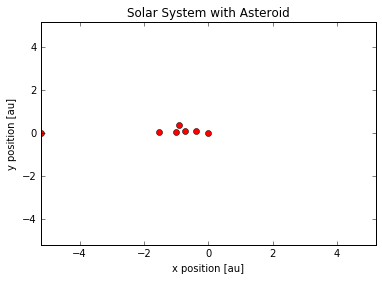

In [308]:
######  Check animation to see if this looks like a collision

import os, sys

ff_path = os.path.join('C:/', 'Program Files/','ImageMagick-7.0.3-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

imgk_path = os.path.join('C:/', 'Program Files/', 'ImageMagick-7.0.3-Q16', 'convert.exe')
plt.rcParams['animation.convert_path'] = imgk_path
if ff_path not in sys.path: sys.path.append(imgk_path)

fig = plt.figure()
ax = plt.axes(xlim=(-D5, D5), ylim=(-D5, D5))
data, = ax.plot([], [], 'ro')
ax.set_xlabel('x position [au]')
ax.set_ylabel('y position [au]')
ax.set_title('Solar System with Asteroid')

def init():
    data.set_data([], [])
    return data,

def animate(time):
    x = Period_Jupiter_Test_Collision[time, 0::4]
    y = Period_Jupiter_Test_Collision[time, 2::4]
    data.set_data(x, y)
    return data,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=20, blit=True)

FFwriter = animation.FFMpegWriter(fps=30)

anim.save(os.path.join('C:/', 'Users/', 'Dito/', 'Documents/', 'UPITT/', 'Fall 2016/', 'Physics 1321/',
                       'Destabilization', 'test3.mp4'), writer = FFwriter, extra_args=['-vcodec', 'libx264'])
